In [1]:
import os
import pickle

import numpy
import pandas
import matplotlib
from matplotlib import pyplot
import seaborn

import scipy.sparse as sp
import scipy.io as spio

import logomaker

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
pandas.set_option('display.max_colwidth', -1)

C:\Users\casti\AppData\Local\Temp\ipykernel_16104\500457552.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pandas.set_option('display.max_colwidth', -1)


In [3]:
data_folder = ''

In [4]:
design_sets_info = [
    # 4 SeqProp sequences, 50nt utr (pick at least 1 with strong hairpin structure)
    {
        'data_filename': 'optimus5_seqprop_designs_50nt.csv',
        'data_design': 'am_st',
        'n_seqs_to_save': 4,
        'output_filename': 'seqprop_optimus5p_50bp_selected.csv',
    },

    # 4 SeqProp sequences, 50nt utr, with VAE reg.
    {
        'data_filename': 'optimus5_seqprop_designs_50nt.csv',
        'data_design': 'am_st_vae',
        'n_seqs_to_save': 4,
        'output_filename': 'seqprop_vae_optimus5p_50bp_selected.csv',
    },

    # 5 SeqProp sequences, 25nt utr (pick at least 1 with strong hairpin structure)
    {
        'data_filename': 'optimus5_seqprop_designs_25nt.csv',
        'data_design': 'am_st',
        'n_seqs_to_save': 5,
        'output_filename': 'seqprop_optimus5p_25bp_selected.csv',
    },

    # 2 SeqProp sequences, 25nt utr, with VAE reg.
    {
        'data_filename': 'optimus5_seqprop_designs_25nt.csv',
        'data_design': 'am_st_vae',
        'n_seqs_to_save': 2,
        'output_filename': 'seqprop_vae_optimus5p_25bp_selected.csv',
    },
]

In [5]:
# Load all data
design_sets_table = pandas.DataFrame()
for design_set_info in design_sets_info:
    data_path = os.path.join(data_folder, design_set_info['data_filename'])
    design_set_table = pandas.read_csv(data_path, delimiter='\t')
    # Design set label
    design_set_table = design_set_table[design_set_table['design']==design_set_info['data_design']]
    # Selected?
    design_set_table['Selected'] = False
    design_set_table.loc[
        design_set_table.iloc[:design_set_info['n_seqs_to_save']].index,
        'Selected',
    ] = True

    design_sets_table = pandas.concat((design_sets_table, design_set_table), axis=0)
design_sets_table

,seq,design,pred_optimus_5,pred_k_mer,pred_k_mer_no_uaug,Selected
0,CCGGATATCCGGATTTAATAGATAGAAGATATAATAAGATAATTATTGCT,am_st,8.296752,8.254829,8.286531,True
1,CCGTAATCCGTTTTATAGTGAGAGAGTAGTAATTTAAGTAGAGAATCGTT,am_st,8.129437,8.345399,8.386566,True
2,ACAGAGAGTTTTCTATAACGTAAATCCGTAGCTAAGTAAGTAGAAGAGTT,am_st,7.935947,8.279336,8.300222,True
3,CCCGTAACTTAATAATATCCGAGATTAGTAGCTAATTTAGCGAGTAGGAA,am_st,7.910669,8.182984,8.340010,True
4,TCGTAAACGTAATTCAGATAGTTTAGTAGTGATCTAGTAGAATTATTGCT,am_st,8.139898,8.454072,8.422899,False
5,CCGTAATCCGGATTTTAAAGAGAATCCGTAACTAACTAGAGAGTATTGCT,am_st,8.164315,8.355341,8.354945,False
6,TTGGAGATATAATTATTACGAGAGTAGGTAATACAATTATAGGGGGGGCC,am_st,8.348085,7.801681,7.967028,False
7,CCCTGATTTAAGTTGTAACCTGATAGCGTAGAAGAATCGTGATTAGTGTC,am_st,8.037037,8.211643,8.390539,False
8,CTGAGATAACAAATCCGATTCTGTAGAGGTTCTAAGTAGATAGAATAGTA,am_st,7.985174,8.322432,8.352151,False
9,CCCTGATAGCGGAGCTAGACTAGTAGAGTGATTAATCCGTAACTAGTGTC,am_st,7.958173,8.051127,8.170775,False


# 50nt 5'UTR designs

In [6]:
# Load MPRA data
data = pandas.read_csv("../../polysome_profiling_sample2019/GSM3130435_egfp_unmod_1.csv.gz")

# Separate data for violin plot
data = data[data['total_reads'] > 1000]
data

,Unnamed: 0,utr,0,1,2,3,4,5,6,7,...,r5,r6,r7,r8,r9,r10,r11,r12,r13,rl
0,120605,CCACTCGATTAACATGTTAACAACATACTCGTCCGGCCGATCAGCGGCTA,1.365472e-04,1.090036e-04,5.717043e-05,0.000033,0.000015,0.000016,0.000009,9.186945e-06,...,0.033645,0.020343,0.019850,0.017988,0.019283,0.033252,0.033252,0.027581,0.035877,3.039939
1,11605,CAAATCATGTGCAGCCCTGGCGACCGTACTGCGGTACAAGAAAGTATAGT,6.661179e-05,6.952406e-05,6.474759e-05,0.000048,0.000023,0.000020,0.000011,1.084524e-05,...,0.049711,0.028540,0.027431,0.024766,0.024241,0.039457,0.039457,0.039840,0.038785,3.895109
2,128224,GTTATACTAGAAGAAACTTGAGATTATGGAGCAGTCCGTCAAGGACGCGA,8.798774e-05,8.087227e-05,5.913157e-05,0.000035,0.000017,0.000016,0.000009,9.485438e-06,...,0.042436,0.022460,0.025015,0.024275,0.021591,0.028353,0.028353,0.028963,0.041985,3.334524
3,239107,CTTAGACAAAAACAACGCGCTTTCCAGTATGCGGAGCCTTGACGGTAAAC,7.773708e-05,7.108933e-05,5.999329e-05,0.000038,0.000025,0.000016,0.000010,8.589960e-06,...,0.041241,0.025793,0.022751,0.022632,0.026617,0.038302,0.038302,0.032788,0.031043,3.575082
4,59082,GTATCAAATCACGGCCAACCCGACGGAGTACCCCGCGTCGATGGTCCGCC,4.373148e-05,4.452323e-05,5.048470e-05,0.000051,0.000033,0.000026,0.000015,1.223821e-05,...,0.071306,0.040719,0.033335,0.030367,0.033080,0.051449,0.051449,0.046052,0.036447,4.593712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145085,208443,TGGTTTGCGACAAGGTGAATCGTGTTAAGCTAAAGCGTGTTATCAAGGAA,4.548074e-07,6.956754e-07,1.753147e-06,0.000002,0.000002,0.000004,0.000004,4.145733e-06,...,0.094477,0.093560,0.100875,0.066926,0.108574,0.077968,0.077968,0.112517,0.085556,7.688016
145086,171450,GGTGTGTGGTTAGTGGGGGGTGCACCCGGTGTTCAACGATAAGTATGGCG,2.169081e-06,1.608749e-06,1.337146e-06,0.000001,0.000001,0.000002,0.000004,3.847241e-06,...,0.060639,0.106241,0.094001,0.092293,0.119454,0.090655,0.090655,0.057670,0.102617,7.483175
145087,100024,AGCTTGTGCCCGGGTTAAGATGGATGCTGCCTCTCGCCACGAAGGAGCGC,8.256504e-06,6.391518e-06,6.240015e-06,0.000003,0.000002,0.000002,0.000001,8.623126e-07,...,0.049720,0.029441,0.022789,0.026168,0.026661,0.047913,0.047913,0.024187,0.036138,3.712467
145088,171731,CCCAACCCATGTCTATTGCCAAGGTCCGAGGCGTTCTGAGCCTAAGCGGT,1.399407e-06,8.695943e-07,7.725733e-07,0.000001,0.000002,0.000002,0.000002,3.150757e-06,...,0.052324,0.048682,0.074883,0.149044,0.163225,0.082168,0.082168,0.087006,0.118388,8.154002


In [7]:
# Make predictions on MPRA sequences with the kmer model
# load test set kmer counts
y_test_hat = spio.loadmat("kmer_model/optimus5_mer23456_no_atg_pred_test.mat")["pred_test"].reshape(-1)
y_test_hat = numpy.sort(y_test_hat)[::-1]

For design strategy am_st:
Sequence CCGGATATCCGGATTTAATAGATAGAAGATATAATAAGATAATTATTGCT in the 0.6324-th percentile (164/25,931)
Sequence CCGTAATCCGTTTTATAGTGAGAGAGTAGTAATTTAAGTAGAGAATCGTT in the 0.1851-th percentile (48/25,931)
Sequence ACAGAGAGTTTTCTATAACGTAAATCCGTAGCTAAGTAAGTAGAAGAGTT in the 0.5206-th percentile (135/25,931)
Sequence CCCGTAACTTAATAATATCCGAGATTAGTAGCTAATTTAGCGAGTAGGAA in the 0.3201-th percentile (83/25,931)
For design strategy am_st_vae:
Sequence CCCAGAGAATATAAATCATAGTATAGTAATCCAAGAGAGTAGAAGATATT in the 0.1465-th percentile (38/25,931)
Sequence GAGAGAGAGTTTATACCACAGAGTAACTTAACCCAATAATAACTAGAGTA in the 0.1157-th percentile (30/25,931)
Sequence CCCGGATAAAAAAACCCTGAGTGTAATCTAAGAGAATCGTAGAAAGAGTA in the 0.8985-th percentile (233/25,931)
Sequence CCCGTAGCGTAAAAAACAATTAGTAGAGAGAAATTATTGAGCGTAAAGTA in the 0.0771-th percentile (20/25,931)


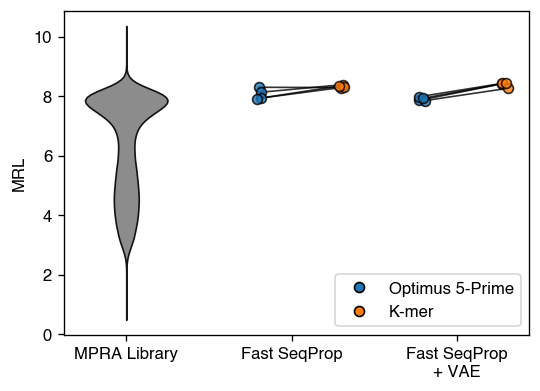

In [8]:
data_to_plot = design_sets_table[design_sets_table['seq'].str.len()==50]
pred_x_offset = 0.25
random_x_offset = 0.1

fig, ax = pyplot.subplots(figsize=(5, 3.5))

vp = ax.violinplot(data['rl'], [-1], showextrema=False)
for body in vp['bodies']:
    body.set_alpha(0.9)
    body.set_facecolor('gray')
    body.set_edgecolor('k')
# quartile1, medians, quartile3 = numpy.percentile(data['rl'], [25, 50, 75])
# # whiskers = np.array([
# #     adjacent_values(sorted_array, q1, q3)
# #     for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
# # whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# ax.scatter(-1, medians, marker='o', color='white', s=30, zorder=3)
# ax.vlines(-1, quartile1, quartile3, color='k', linestyle='-', lw=5)
# # ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
# ax.boxplot(data['rl'], positions=[-1])

for design_idx, design in enumerate(data_to_plot['design'].unique()):
    print(f"For design strategy {design}:")
    design_table = data_to_plot[data_to_plot['design']==design]

    # for index, row in design_table[~design_table['Selected']].iterrows():
    #     x_offset = numpy.random.rand()*random_x_offset
    #     ax.plot(
    #         [design_idx - pred_x_offset + x_offset, design_idx + pred_x_offset + x_offset],
    #         [row['pred_optimus_5'], row['pred_k_mer_no_uaug']],
    #         linewidth=1,
    #         color='k',
    #         alpha=0.25,
    #         zorder=1,
    #     )
    #     ax.scatter(
    #         [design_idx - pred_x_offset + x_offset],
    #         [row['pred_optimus_5']],
    #         linewidth=1,
    #         color='tab:blue',
    #         marker='o',
    #         s=35,
    #         alpha=0.25,
    #         zorder=2,
    #     )
    #     ax.scatter(
    #         [design_idx + pred_x_offset + x_offset],
    #         [row['pred_k_mer_no_uaug']],
    #         linewidth=1,
    #         color='tab:orange',
    #         marker='o',
    #         s=35,
    #         alpha=0.25,
    #         zorder=2,
    #     )
    for index, row in design_table[design_table['Selected']].iterrows():
        x_offset = numpy.random.rand()*random_x_offset
        ax.plot(
            [design_idx - pred_x_offset + x_offset, design_idx + pred_x_offset + x_offset],
            [row['pred_optimus_5'], row['pred_k_mer_no_uaug']],
            linewidth=1,
            color='k',
            alpha=0.8,
            zorder=1,
        )
        ax.scatter(
            [design_idx - pred_x_offset + x_offset],
            [row['pred_optimus_5']],
            linewidth=1,
            color='tab:blue',
            marker='o',
            s=35,
            alpha=0.8,
            edgecolors='k',
            zorder=2,
        )
        ax.scatter(
            [design_idx + pred_x_offset + x_offset],
            [row['pred_k_mer_no_uaug']],
            linewidth=1,
            color='tab:orange',
            marker='o',
            s=35,
            alpha=0.8,
            edgecolors='k',
            zorder=2,
        )
        # Calculate percentile of prediction
        seq_idx = numpy.where(y_test_hat < row['pred_k_mer_no_uaug'])[0][0]
        print(f"Sequence {row['seq']} in the {seq_idx/len(y_test_hat)*100:.4f}-th percentile ({seq_idx}/{len(y_test_hat):,})")

ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['MPRA Library', 'Fast SeqProp', 'Fast SeqProp\n+ VAE'])
ax.set_ylabel('MRL')

ax.legend(
    handles=[
        matplotlib.lines.Line2D(
            [0], [0],
            marker='o',
            color='tab:blue',
            markeredgecolor='k',
            linestyle='',
            label='Optimus 5-Prime',
        ),
        matplotlib.lines.Line2D(
            [0], [0],
            marker='o',
            color='tab:orange',
            markeredgecolor='k',
            linestyle='',
            label='K-mer',
        ),
    ],
    loc='lower right',
)

fig.savefig('seqprop_50nt_optimus_vs_kmer.png', dpi=200, bbox_inches='tight')
fig.savefig('seqprop_50nt_optimus_vs_kmer.svg', dpi=200, bbox_inches='tight')

# 25nt 5'UTR designs

In [9]:
# Load MPRA data
data = pandas.read_csv("../../polysome_profiling_data/random_end_hek293t_N25_combined.csv.gz")
data = data[data['total'] > 1000]
data

,UTR,total,rl,error
0,ACATCGTAGAGAGTCGTACTTACCG,20252.0,5.584273,0.140398
1,AGAAGGTCGCGGCGTTTAGAATTCA,18955.0,6.683197,0.095390
2,AGAGATGAGCATTAAAATGGAACAA,12267.0,6.175643,0.139664
3,AGAGGATTTGAGGTTTTCGCATATT,11987.0,6.785426,0.158523
4,TCTACCGACGGTTAGTATTTATGCC,10255.0,6.548138,0.009790
...,...,...,...,...
7121,CGAGAGTATTCGATTGGCTGTACTG,1001.0,6.463582,0.349945
7122,AAAGAGTACTGTGCGTGTAGTCCAA,1001.0,6.447912,0.322441
7123,AGCTTGGTAGGTACAGTCTCAAGCA,1001.0,5.830325,0.275696
7124,GGATCTTTTTTTGCCGTGCTTAAGT,1001.0,6.527299,0.061613


In [10]:
# Make predictions on MPRA sequences with the kmer model
# load test set kmer counts
y_test_hat = spio.loadmat("kmer_model/optimus5_mer23456_25nt_no_atg_pred_test.mat")["pred_test"].reshape(-1)
y_test_hat = numpy.sort(y_test_hat)[::-1]

For design strategy am_st:
Sequence TTACGAGTAGAGAAGACCTTCTGAA in the 6.3177-th percentile (717/11,349)
Sequence TTTGACCTTTCCTACTGATAGAGAA in the 0.0088-th percentile (1/11,349)
Sequence CAAACTCTCTGAGGAGAGGTTTAAA in the 1.1719-th percentile (133/11,349)
Sequence TTTCCGTCTACTCGAGAGAGGAAAA in the 0.0088-th percentile (1/11,349)
Sequence TTCGAGCGACCTGAATTAGAGGACA in the 0.6168-th percentile (70/11,349)
For design strategy am_st_vae:
Sequence TTTACCGGAATCCGAATTTGCGAAA in the 0.0529-th percentile (6/11,349)
Sequence TTCCGACCTTCCGAGGAGTTTAAGA in the 4.5378-th percentile (515/11,349)


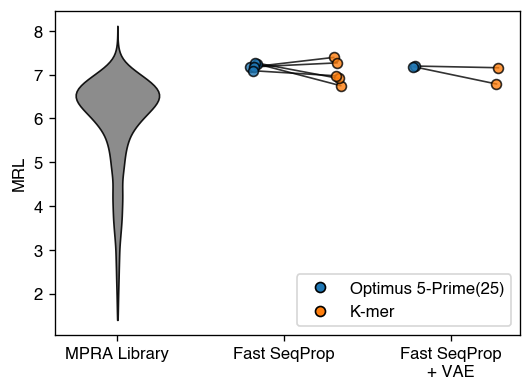

In [11]:
data_to_plot = design_sets_table[design_sets_table['seq'].str.len()==25]
pred_x_offset = 0.25
random_x_offset = 0.1

fig, ax = pyplot.subplots(figsize=(5, 3.5))

vp = ax.violinplot(data['rl'], [-1], showextrema=False)
for body in vp['bodies']:
    body.set_alpha(0.9)
    body.set_facecolor('gray')
    body.set_edgecolor('k')
# quartile1, medians, quartile3 = numpy.percentile(data['rl'], [25, 50, 75])
# # whiskers = np.array([
# #     adjacent_values(sorted_array, q1, q3)
# #     for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
# # whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

# ax.scatter(-1, medians, marker='o', color='white', s=30, zorder=3)
# ax.vlines(-1, quartile1, quartile3, color='k', linestyle='-', lw=5)
# # ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
# ax.boxplot(data['rl'], positions=[-1])

for design_idx, design in enumerate(data_to_plot['design'].unique()):
    print(f"For design strategy {design}:")
    design_table = data_to_plot[data_to_plot['design']==design]

    # for index, row in design_table[~design_table['Selected']].iterrows():
    #     x_offset = numpy.random.rand()*random_x_offset
    #     ax.plot(
    #         [design_idx - pred_x_offset + x_offset, design_idx + pred_x_offset + x_offset],
    #         [row['pred_optimus_5'], row['pred_k_mer_no_uaug']],
    #         linewidth=1,
    #         color='k',
    #         alpha=0.25,
    #         zorder=1,
    #     )
    #     ax.scatter(
    #         [design_idx - pred_x_offset + x_offset],
    #         [row['pred_optimus_5']],
    #         linewidth=1,
    #         color='tab:blue',
    #         marker='o',
    #         s=35,
    #         alpha=0.25,
    #         zorder=2,
    #     )
    #     ax.scatter(
    #         [design_idx + pred_x_offset + x_offset],
    #         [row['pred_k_mer_no_uaug']],
    #         linewidth=1,
    #         color='tab:orange',
    #         marker='o',
    #         s=35,
    #         alpha=0.25,
    #         zorder=2,
    #     )
    for index, row in design_table[design_table['Selected']].iterrows():
        x_offset = numpy.random.rand()*random_x_offset
        ax.plot(
            [design_idx - pred_x_offset + x_offset, design_idx + pred_x_offset + x_offset],
            [row['pred_optimus_5'], row['pred_k_mer_no_uaug']],
            linewidth=1,
            color='k',
            alpha=0.8,
            zorder=1,
        )
        ax.scatter(
            [design_idx - pred_x_offset + x_offset],
            [row['pred_optimus_5']],
            linewidth=1,
            color='tab:blue',
            marker='o',
            s=35,
            alpha=0.8,
            edgecolors='k',
            zorder=2,
        )
        ax.scatter(
            [design_idx + pred_x_offset + x_offset],
            [row['pred_k_mer_no_uaug']],
            linewidth=1,
            color='tab:orange',
            marker='o',
            s=35,
            alpha=0.8,
            edgecolors='k',
            zorder=2,
        )
        # Calculate percentile of prediction
        seq_idx = numpy.where(y_test_hat < row['pred_k_mer_no_uaug'])[0][0]
        print(f"Sequence {row['seq']} in the {seq_idx/len(y_test_hat)*100:.4f}-th percentile ({seq_idx}/{len(y_test_hat):,})")
ax.set_xticks([-1, 0, 1])
ax.set_xticklabels(['MPRA Library', 'Fast SeqProp', 'Fast SeqProp\n+ VAE'])
ax.set_ylabel('MRL')

ax.legend(
    handles=[
        matplotlib.lines.Line2D(
            [0], [0],
            marker='o',
            color='tab:blue',
            markeredgecolor='k',
            linestyle='',
            label='Optimus 5-Prime(25)',
        ),
        matplotlib.lines.Line2D(
            [0], [0],
            marker='o',
            color='tab:orange',
            markeredgecolor='k',
            linestyle='',
            label='K-mer',
        ),
    ],
    loc='lower right',
)

fig.savefig('seqprop_25nt_optimus_vs_kmer.png', dpi=200, bbox_inches='tight')
fig.savefig('seqprop_25nt_optimus_vs_kmer.svg', dpi=200, bbox_inches='tight')